In [1]:
import os
import cv2
path = "E:/DATA/ML/Dataset"
classlist = os.listdir(path)
#checking for classes present in directory

In [2]:
NoOfClass = len(classlist)

In [3]:
images = []
labels = []
for i in ['without_mask', 'with_mask']:
    imageNameList=os.listdir("E:/DATA/ML/dataset/" + str(i))
    for fileName in imageNameList:
        Image=cv2.imread("E:/DATA/ML/dataset/" + str(i) + "/" + str(fileName))
        try:
            gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
            Image=cv2.resize(gray,(100,100))
            images.append(Image)
            if i=="without_mask":
                labels.append(0)
            else:
                labels.append(1)
        except:
            pass
    print("Inside folder ", i) 

Inside folder  without_mask
Inside folder  with_mask


In [4]:
import numpy as np

In [5]:
images = np.array(images)
labels = np.array(labels)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_features,test_features,train_target,test_target=train_test_split(images,labels,test_size=0.2)

In [8]:
def preprocessing(img):
    img=img/255
    return img

In [9]:
train_features=np.array(list(map(preprocessing,train_features)))

In [10]:
train_features=train_features.reshape(train_features.shape[0], train_features.shape[1],train_features.shape[2],1)

In [11]:
test_features=np.array(list(map(preprocessing,test_features)))
test_features=test_features.reshape(test_features.shape[0],test_features.shape[1],test_features.shape[2],1)

In [12]:
test_features.shape

(762, 100, 100, 1)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
dataGenerator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [15]:
dataGenerator.fit(train_features)

In [16]:
batches=dataGenerator.flow(train_features,train_target,batch_size=10)

In [17]:
batches

In [18]:
X_batch,y_batch=next(batches)

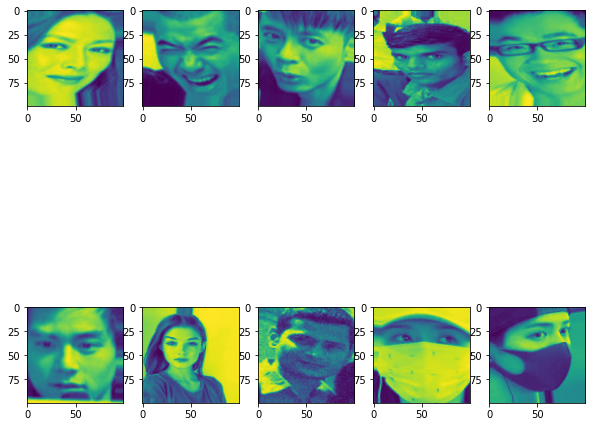

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_batch[i].reshape(100,100))
plt.show()

In [20]:
train_features.shape

(3048, 100, 100, 1)

In [21]:
from keras.utils import to_categorical

In [22]:
train_target=to_categorical(train_target)

In [23]:
test_target=to_categorical(test_target)

In [24]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout

In [25]:
model=Sequential()
model.add(Conv2D(60,(5,5),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(Conv2D(30,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [26]:
from keras.optimizers import Adam

In [27]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [52]:
model.fit_generator(dataGenerator.flow(train_features,train_target,batch_size=20),epochs=20)

Epoch 1/15
153/153 [==============================] - 141s 924ms/step - loss: 0.3550 - accuracy: 0.8458
Epoch 2/15
153/153 [==============================] - 142s 927ms/step - loss: 0.3180 - accuracy: 0.8629
Epoch 3/15
153/153 [==============================] - 142s 928ms/step - loss: 0.3152 - accuracy: 0.8619
Epoch 4/15
153/153 [==============================] - 142s 930ms/step - loss: 0.3156 - accuracy: 0.8665
Epoch 5/15
153/153 [==============================] - 142s 929ms/step - loss: 0.2889 - accuracy: 0.8737
Epoch 6/15
153/153 [==============================] - 142s 931ms/step - loss: 0.2724 - accuracy: 0.8819
Epoch 7/15
153/153 [==============================] - 142s 931ms/step - loss: 0.2757 - accuracy: 0.8783
Epoch 8/15
153/153 [==============================] - 142s 930ms/step - loss: 0.2888 - accuracy: 0.8816
Epoch 9/15
153/153 [==============================] - 142s 931ms/step - loss: 0.2626 - accuracy: 0.8907
Epoch 10/15
153/153 [==============================] - 145s 951m

In [53]:
def getClassName(classNo):
    if   classNo == 0: return 'without_mask'
    elif classNo == 1: return 'with_mask'

In [54]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180) 

False

In [56]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    success,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=preprocessing(img)
    cv2.imshow("Processed Image",img)
    img=img.reshape(1,100,100,1)
    cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    predictions=model.predict(img)
    classIndex=model.predict_classes(img)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.80:
        cv2.putText(imgOriginal,str(classIndex)+"="+str(getClassName(classIndex)) +"->"+str(100*probabilityValue),(120,35),font,0.75,(0,255,0),2,cv2.LINE_AA)

    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1)==113:
        cv2.destroyAllWindows()
        break

In [32]:
train_features.shape

(3048, 100, 100, 1)

In [33]:
test_features.shape


(762, 100, 100, 1)